In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
df0 = df[:50] #DataFrame for setosa

In [21]:
df1 = df[50:100] 

In [22]:
df2 = df[100:]

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

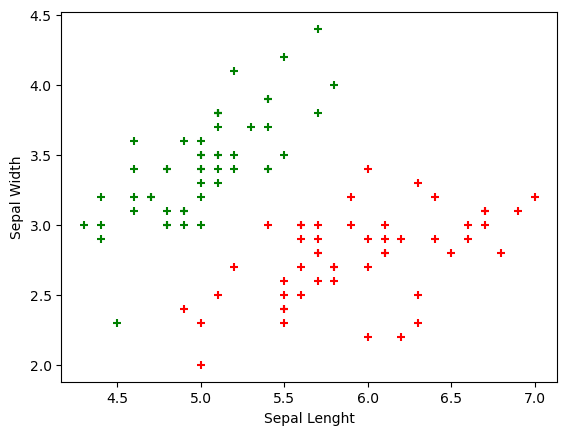

In [25]:
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red', marker = '+')

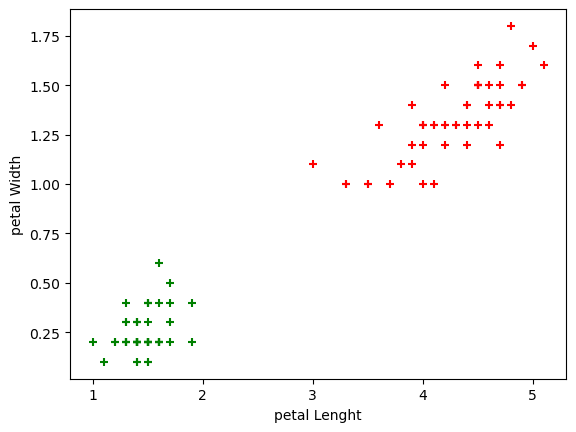

In [26]:
plt.xlabel('petal Lenght')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'red', marker = '+')

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
x = df.drop(['target','flower_name'],axis = 'columns')
y = df.target

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [37]:
from sklearn.svm import SVC
model = SVC()

In [38]:
model.fit(x_train,y_train)

SVC()

In [39]:
model.score(x_test,y_test)

0.9666666666666667

In [41]:
model.predict([[5.1,3.5,1.4,0.2]])

/Users/dipeshkumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [43]:
model.predict(x_test)

array([1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 0, 0, 1, 0])

In [56]:
#REGURALIZATION : TUNING
model_c = SVC(C=10)

In [73]:
model_c.fit(x_train,y_train)
y_pred = model_c.fit(x_test)

TypeError: BaseLibSVM.fit() missing 1 required positional argument: 'y'

In [74]:
model_c.score(x_test,y_pred)

1.0

In [67]:
#GAMMA
model_g = SVC(gamma = 10)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9

In [71]:
#KERNEL

model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(x_train,y_train)
y_pred = model_linear_kernel.predict(x_test)

In [72]:
model_linear_kernel.score(x_test,y_pred)

1.0